In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import random
import csv
import json
import seaborn

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [13]:
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lats = []
lngs = []
for x in range(500):
    lats.append(random.randrange(-90,90))
    lngs.append(random.randrange(-180,180))
locs =(zip(lats,lngs))



Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [15]:
#Uses Citipy to identify the nearest city
cities = []
weatherdata_df = pd.DataFrame(columns = ['City','Temp','Humidity','Clouds','Wind_Speed'])
response_data = []

for key,value in locs:
    city = citipy.nearest_city(key,value)
    cities.append(city)

city_counter = 0
print('Beginning Data Retrieval')
print('-----------------------------')
for location in cities:
    print('Processing record '+str(city_counter)+' of '+ str(len(cities))+"|"+location.city_name)
    city_counter +=1
    
    try:
        params = {
            'appid': api_key,
            'units': units,
            'q': location.city_name+","+location.country_code
        }
                     
       
        response = req.get(endpoint, params=params).json()
        response_data.append(response)
        target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (params['units'],api_key,location.city_name.strip())
        
        
    except:
        continue


print('Data Retrieval Complete')    


Beginning Data Retrieval
-----------------------------
Processing record 0 of 500|tomatlan
Processing record 1 of 500|lorengau
Processing record 2 of 500|sarahan
Processing record 3 of 500|yellowknife
Processing record 4 of 500|mataura
Processing record 5 of 500|butaritari
Processing record 6 of 500|puerto ayora
Processing record 7 of 500|kavaratti
Processing record 8 of 500|sinkat
Processing record 9 of 500|taolanaro
Processing record 10 of 500|fortuna
Processing record 11 of 500|busselton
Processing record 12 of 500|padang
Processing record 13 of 500|coquimbo
Processing record 14 of 500|kaitangata
Processing record 15 of 500|mersing
Processing record 16 of 500|taolanaro
Processing record 17 of 500|new norfolk
Processing record 18 of 500|khatanga
Processing record 19 of 500|hithadhoo
Processing record 20 of 500|luwuk
Processing record 21 of 500|rochegda
Processing record 22 of 500|mataura
Processing record 23 of 500|hobart
Processing record 24 of 500|arraial do cabo
Processing record 

Processing record 216 of 500|jamestown
Processing record 217 of 500|illoqqortoormiut
Processing record 218 of 500|viligili
Processing record 219 of 500|carora
Processing record 220 of 500|norman wells
Processing record 221 of 500|castro
Processing record 222 of 500|lebu
Processing record 223 of 500|tuktoyaktuk
Processing record 224 of 500|qaqortoq
Processing record 225 of 500|busselton
Processing record 226 of 500|punta arenas
Processing record 227 of 500|prieska
Processing record 228 of 500|levelek
Processing record 229 of 500|bonthe
Processing record 230 of 500|gladstone
Processing record 231 of 500|hithadhoo
Processing record 232 of 500|airai
Processing record 233 of 500|taoudenni
Processing record 234 of 500|hilo
Processing record 235 of 500|saskylakh
Processing record 236 of 500|petaluma
Processing record 237 of 500|cocobeach
Processing record 238 of 500|vardo
Processing record 239 of 500|yellowknife
Processing record 240 of 500|punta arenas
Processing record 241 of 500|rocha
Proc

Processing record 434 of 500|pisco
Processing record 435 of 500|mataura
Processing record 436 of 500|codrington
Processing record 437 of 500|barrow
Processing record 438 of 500|east london
Processing record 439 of 500|touros
Processing record 440 of 500|alice town
Processing record 441 of 500|evensk
Processing record 442 of 500|atuona
Processing record 443 of 500|ilhabela
Processing record 444 of 500|busselton
Processing record 445 of 500|new norfolk
Processing record 446 of 500|carnarvon
Processing record 447 of 500|talnakh
Processing record 448 of 500|ushuaia
Processing record 449 of 500|padang
Processing record 450 of 500|mataura
Processing record 451 of 500|lata
Processing record 452 of 500|illoqqortoormiut
Processing record 453 of 500|san rafael del sur
Processing record 454 of 500|changtu
Processing record 455 of 500|bambous virieux
Processing record 456 of 500|albany
Processing record 457 of 500|mataura
Processing record 458 of 500|muros
Processing record 459 of 500|darnah
Proce

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [16]:
#creates a dataframe to store the responses and then save it to a csv    
response_df = pd.DataFrame(response_data)
response_df.to_csv('saved_data.csv')  

In [18]:
clean_rd = [s for s in response_data if s['cod']!='404' ]

temp_data = [response['main']['temp'] for response in clean_rd]
loc_data = [response['name'] for response in clean_rd]
humid_data = [response['main']['humidity'] for response in clean_rd]
cloud_data = [response['clouds']['all'] for response in clean_rd]
wind_data = [response['wind']['speed'] for response in clean_rd]
country_data = [response['sys']['country'] for response in clean_rd]
date_data = [response['dt'] for response in clean_rd]
lat_data = [response['coord']['lat'] for response in clean_rd]
lon_data = [response['coord']['lon'] for response in clean_rd]
max_temp_data = [response['main']['temp_max'] for response in clean_rd]


weatherdata_df['Wind_Speed']=wind_data
weatherdata_df['Clouds']=cloud_data
weatherdata_df['Humidity']=humid_data
weatherdata_df['Temp']=temp_data
weatherdata_df['City']=loc_data
weatherdata_df['Country'] = country_data
weatherdata_df['Date'] = date_data
weatherdata_df['Lat'] = lat_data
weatherdata_df['Lng'] = lon_data
weatherdata_df['Max Temp'] = max_temp_data

weatherdata_df = weatherdata_df[['City','Clouds','Country','Date','Humidity','Lat','Lng','Max Temp','Wind_Speed']]
weatherdata_df.head()


,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,Tomatlan,18,MX,1575430203,97,19.93,-105.25,70.39,0.63
1,Lorengau,98,PG,1575430203,67,-2.02,147.27,84.92,2.62
2,Sarahan,91,IN,1575430203,32,31.51,77.79,20.21,15.37
3,Yellowknife,40,CA,1575430203,76,62.45,-114.38,-5.01,13.87
4,Butaritari,1,KI,1575430204,72,3.07,172.79,84.69,9.04


In [19]:
#creates dataframes for each plot for the sake of clean data management
temps_df = pd.DataFrame(columns = ['Temps','Lats'])
humid_df = pd.DataFrame(columns = ['Humidity','Lats'])
cloud_df = pd.DataFrame(columns = ['Cloudiness','Lats'])
wind_df = pd.DataFrame(columns = ['Wind_Speed','Lats'])

lat_data = [response['coord']['lat'] for response in clean_rd]

#fills in the latitude data values
wind_df['Lats'] = lat_data
cloud_df['Lats'] = lat_data
humid_df['Lats'] = lat_data
temps_df['Lats'] = lat_data

#fills in the requested value for each 
wind_df['Wind_Speed'] = weatherdata_df['Wind_Speed']
cloud_df['Cloudiness'] = weatherdata_df['Clouds']
humid_df['Humidity'] = weatherdata_df['Humidity']
temps_df['Temps'] = weatherdata_df['Max Temp']


Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

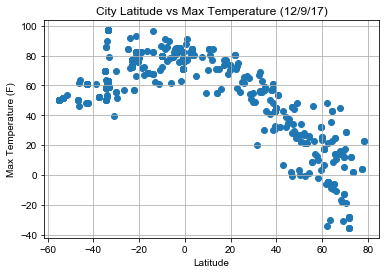

In [20]:
temp_plot = plt.scatter(temps_df['Lats'],temps_df['Temps'])
plt.title('City Latitude vs Max Temperature (12/9/17)')
plt.style.use('seaborn-dark')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Temp.png')
plt.show()


Latitude vs. Humidity Plot

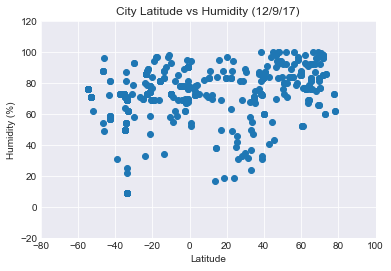

In [21]:
humid_plot = plt.scatter(humid_df['Lats'],humid_df['Humidity'])
plt.title('City Latitude vs Humidity (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Humid.png')
plt.show()


 Latitude vs. Cloudiness Plot

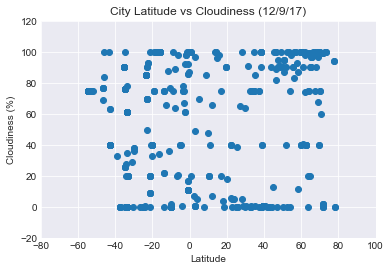

In [22]:
cloud_plot = plt.scatter(cloud_df['Lats'],cloud_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Cloud.png')
plt.show()


 Latitude vs. Wind Speed Plot

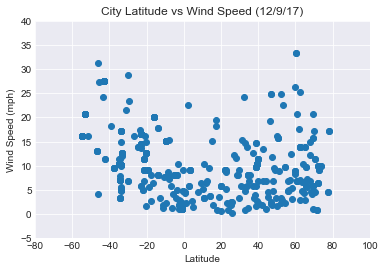

In [23]:
wind_plot = plt.scatter(wind_df['Lats'],wind_df['Wind_Speed'])
plt.title('City Latitude vs Wind Speed (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Wind.png')
plt.show()
